In [10]:
!pip install imutils


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import sys
assert sys.version_info >=(3, 7)

import numpy as np
import cv2 as cv
from util_func import *
import imutils 

Q1 Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.

In [12]:
img = cv.imread("images/lena.jfif")

rotated = imutils.rotate_bound(img, 45)
cv.imshow("Imutils Rotation", rotated)
cv.waitKey(0)

27

In [13]:
img = cv.imread("images/lena.jfif")

# Determine the center of the image
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
yc, xc = h // 2, w // 2

angle = 45

M = cv.getRotationMatrix2D(center, angle, 1.0)
dst = cv.warpAffine(img, M, (w+yc, h+xc))

show_img("rotation", dst)

Q2

In [14]:
img = cv.imread("images/native-bee.png")
img2 = cv.imread("images/flower.jfif")

rows, cols, channels = img2.shape
roi = img[0:rows, 0:cols]

img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
#70 = intensity value of the pixel, to remove black bg, 255, maximum intensity value
ret, mask = cv.threshold(img2gray, 70, 255, cv.THRESH_BINARY) 
mask_inv = cv.bitwise_not(mask)

img_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

dst = cv.add(img_bg,img2_fg)
img[0:rows, 0:cols] = dst

show_img("result", img)
cv.waitKey(0)
cv.destroyAllWindows()

Q3 Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':

(<Axes: title={'center': 'normal'}>, None)

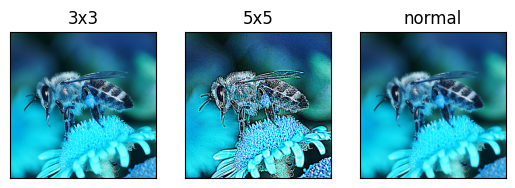

In [15]:
img = cv.imread("images/native-bee.png")

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel2 = np.array([[-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, 25, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1]])

dst = cv.filter2D(img, -1, kernel)
dst2 = cv.filter2D(img, -1, kernel2)

plt.subplot(131), plt_img(dst, "3x3") 
#sharpend wihtin the range of formula  (sharpened = original + (original − blurred) × amount), pic look obvious and clean
plt.subplot(132), plt_img(dst2, "5x5") 
#Way too much sharpend, consists of noise in the picture
plt.subplot(133), plt_img(img, "normal")

Q4 Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image

In [16]:
image_path = "images/noise_lena.jpg"
image = cv.imread(image_path)

# Apply average filter (blur)
average_filtered = cv.blur(image, (5, 5))

# Apply Gaussian filter
gaussian_filtered = cv.GaussianBlur(image, (5, 5), 0)

# Apply median filter
median_filtered = cv.medianBlur(image, 5)

# Display the original and filtered images
cv.imshow("Original Image", image)
cv.imshow("Average Filtered", average_filtered)
cv.imshow("Gaussian Filtered", gaussian_filtered)
cv.imshow("Median Filtered", median_filtered)
cv.waitKey(0)
cv.destroyAllWindows()

# Average filter is blurry but smooth
# Gaussian filter has fewer noises but the overall shape of the object is clear
# Reduces the noises significantly